In [31]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import numpy as np
from scipy import misc
import sys
sys.path.insert(0,'../libs')
import ruidos as noise
from scipy.signal import convolve2d
%aimport edge_detectors
# import edge_detectors as ed
from image_helpers import *

# Pŕactica *Detección de bordes*

## Ejercicio 1 

In [50]:
img = misc.imread("lena.png")
print(img.shape)

(512, 512)


Lenas contaminadas con ruido Gaussiano


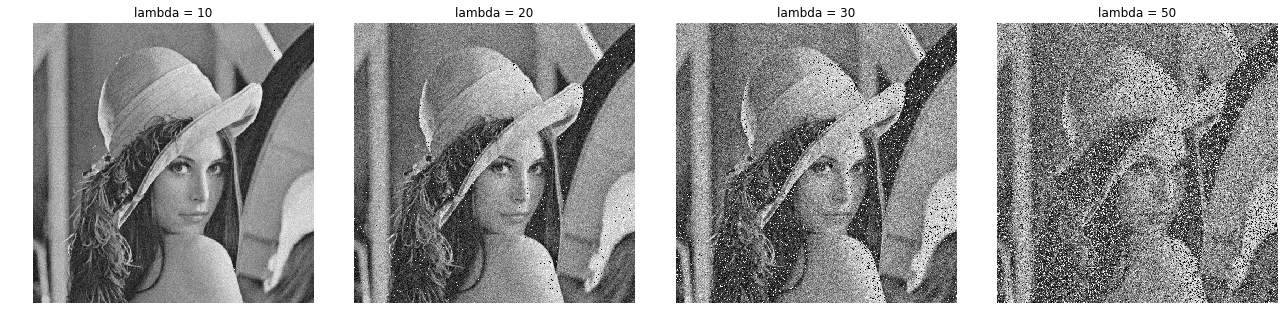

Lenas contaminadas con ruido de Rayleigh


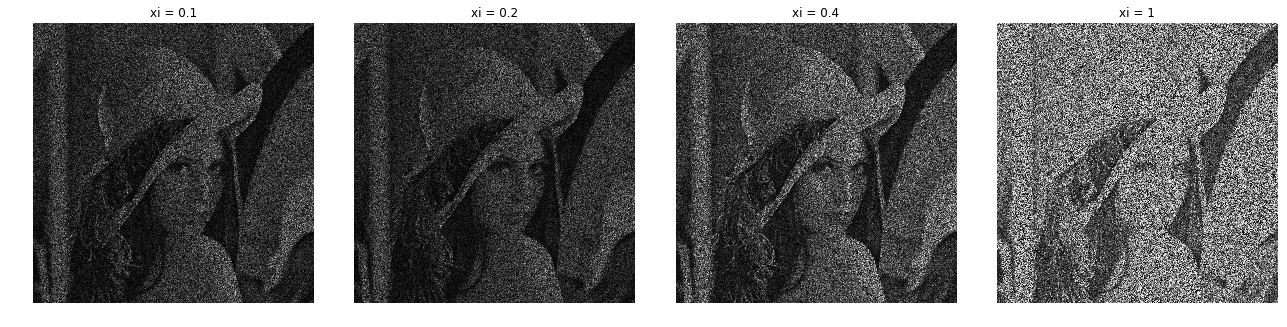

In [55]:
lambda_s = [10,20, 30,50]
xi_s = [.1,.2,.4, 1]
gaussian_contaminated_lenas = [noise.add_gaussian_noise(img, 0, l) for l in lambda_s]
rayleigh_contminated_lenas = [noise.mult_rayleigh_noise(img, x) for x in xi_s]

print("Lenas contaminadas con ruido Gaussiano")
show_img_s(gaussian_contaminated_lenas, ["lambda = " + str(l) for l in lambda_s])
print("Lenas contaminadas con ruido de Rayleigh")
show_img_s(rayleigh_contminated_lenas, ["xi = " + str(x) for x in xi_s])

## Ejercicio 2

### Método del Laplaciano

laplaciano ED + lena original


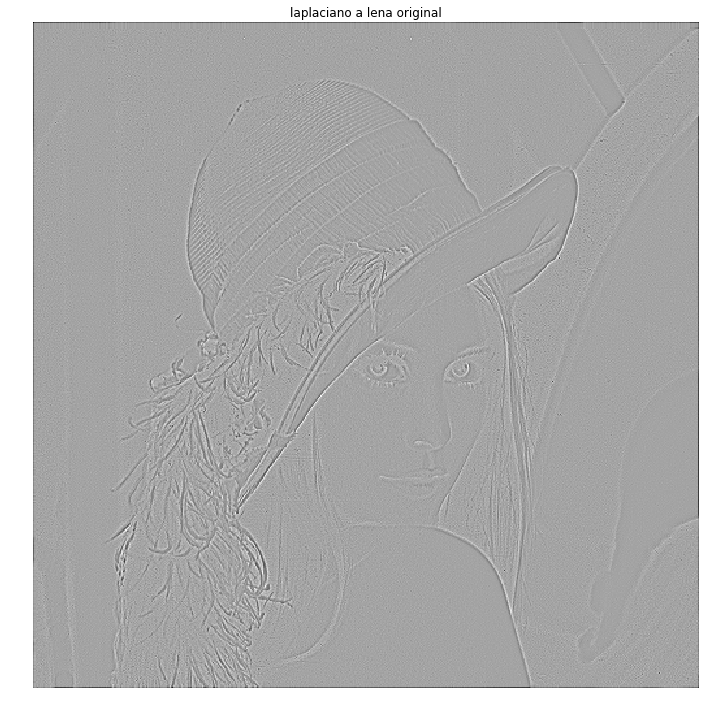

laplaciano ED + lena's contaminadas con ruido Gaussiano aditivo


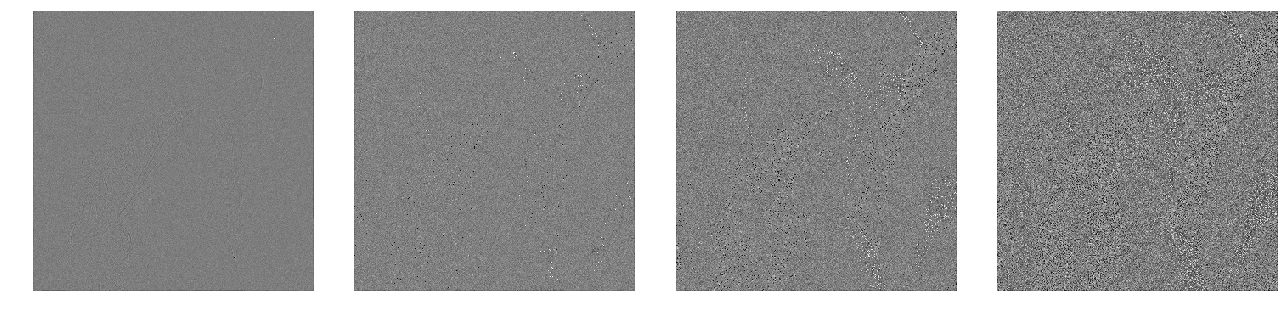

laplaciano ED + lena's contaminadas con ruido de Rayleigh multiplicativo


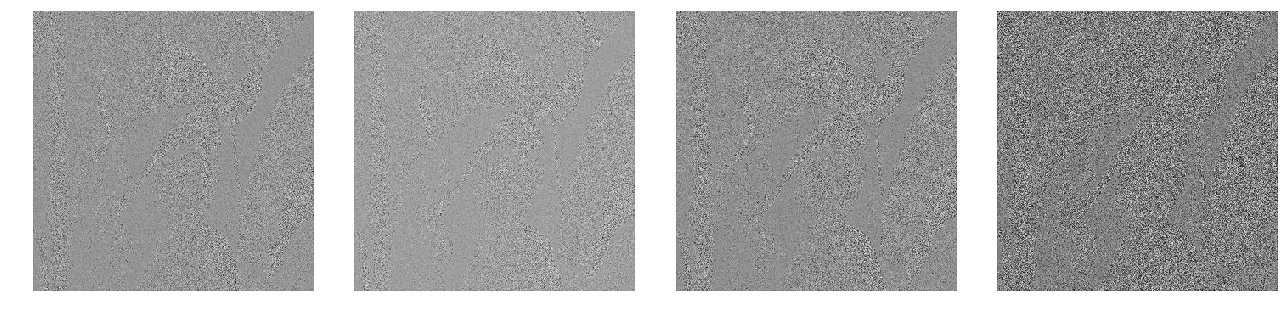

In [66]:
print("laplaciano ED + lena original")
show_img_s([edge_detectors.laplacian(img)],["laplaciano a lena original"])
print("laplaciano ED + lena's contaminadas con ruido Gaussiano aditivo")
show_img_s([edge_detectors.laplacian(i) for i in gaussian_contaminated_lenas])
print("laplaciano ED + lena's contaminadas con ruido de Rayleigh multiplicativo")
show_img_s([edge_detectors.laplacian(i) for i in rayleigh_contminated_lenas])

### Método del Laplaciano con evaluación local de varianza

Prueba del **LLV**(Laplacian edge detector with Local Variance threshold) sin suavizar la imagen antes de calcular el laplaciano.

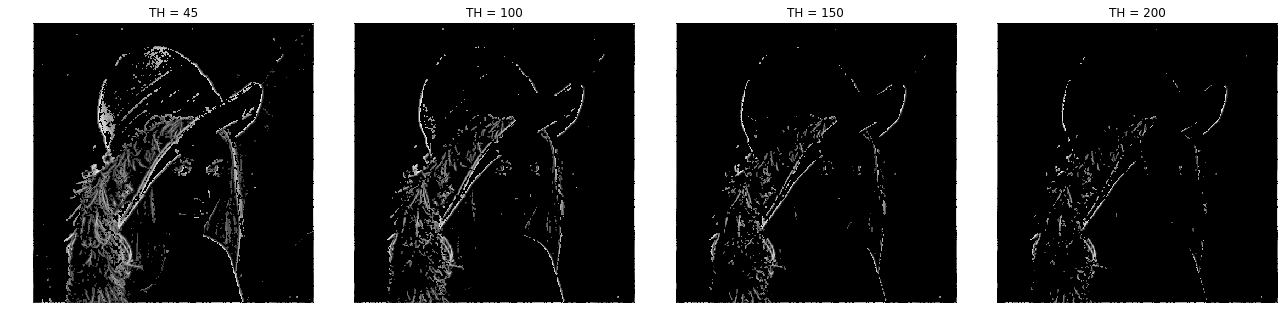

In [114]:
th_range = [45,100,150,200]
show_img_s([edge_detectors.LLV(img, th) for th in th_range], ["TH = " + str(th) for th in th_range])

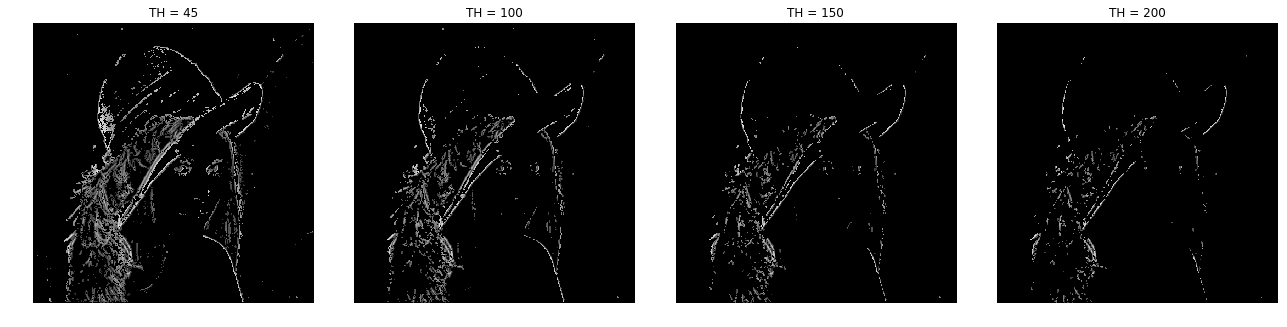

In [115]:
show_img_s([edge_detectors.LLV(img, th, _smooth_pre_laplacian=True) for th in th_range], ["TH = " + str(th) for th in th_range])

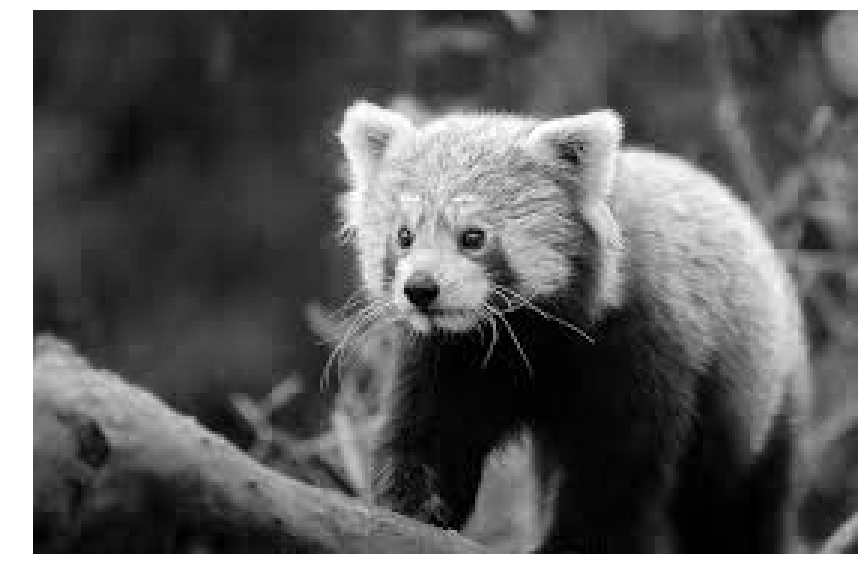

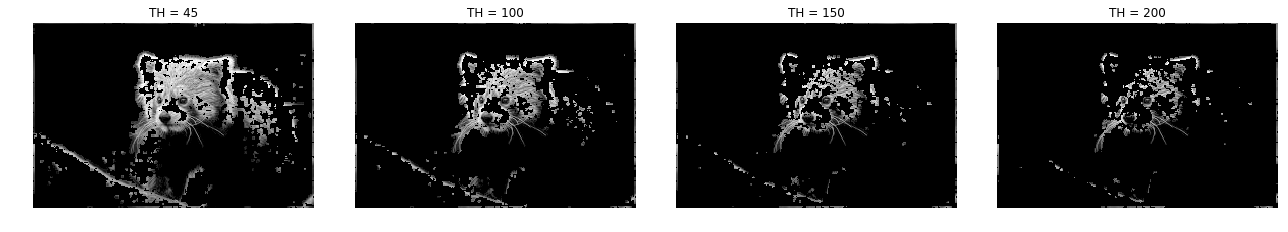

In [105]:
SHARPEN_KERNEL = [[0,-1/float(4),0],[-1/float(4),2,-1/float(4)],[0,-1/float(4),0]]
perro_koala = misc.imread("perro_koala.jpg")[:,:,0] # me quedo con el canal rojo
# perro_koala = convolve2d(perro_koala, SHARPEN_KERNEL, mode="same")
show_img(perro_koala)
show_img_s([edge_detectors.LLV(perro_koala, th) for th in th_range], ["TH = " + str(th) for th in th_range])